# Capstone Project

##### Akash Dalzell

### Predicting Credit Card Default

## Introduction

### Acknowledgement

This dataset is provided publically by UCI Machine learning repository.
Yeh, I.(2016). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients]. Taiwan: Chung Hua University, Department of Information Management; Tamkang University, Department of Civil Engineering.

Special thanks to my lectures and classmates that gave me recommendations and some fine tuning on this project

### Data Background
The data I have chosen to analyse is the Taiwanese credit card information from April 2005 to September 2005 (6 months) to see if machine learning models can used to predict if a customer is at high risk for default, and if so what is the accuracy and precision of the model.

This data has 25 columns all describing a certain aspect of a credit card holders life:

1: Customers ID

2: Limit Balance - maximum amount of credit

3: Sex

4: Education Level

5: Marital status

6: Age

7-12 : Repayment status where -1 = on time payment, 1 = one month behind (Starts on Septemeber and works backwards in time)

13-18 : Amount needing to be repayed (Moving back in time from Sep)

19:24 : Amount payed in previous month

25: Defaulted on payment (1 = yes, 0 = no), which will also be out target variable
Defaulting on 

All currency used in this dataset is Taiwan Dollar, NT. Putting this currency into persepective in 2005 one NZD = 35748.99 TWD/NT. https://moneyexchangerate.org/calculator/twd/2005

This data contains information on 30,000 credit card holders at the bank. 

### Business Importance

In this world where innovation builds empires and the lack of, leaving globally influential organizations as an afterthought, you have no choice but to adopt the industry leading standards. The banking industry saw a huge innovation and transition with paperless currency and back in 2005 this transition had reached its full momentum. However, the banks had a very destructive view point on this new aspect of their business. Where in 2005 the vice president of the credit card department at Chinatrust can be quoted to say “The credit card business itself may not be profitable for banks, but it is a way to establish connections with customers and bring in additional business,”

In the attempt to gain more market share, the card-issuing banks in Taiwan over-issued credit cards with high credit limits to either unqualified or high-risk customers. This doubles down with customers behaviours on overusing past the credit limit, irrespective on their ability of repaying the debt. 

Banks income mostly comes from interest on credit, the higher the risk of credit the banks are exposed to, the higher profit margins the bank will seek. The debt we are exploring is apart of the highest risk credit a bank can give out, unsecured debt, but this also means, it is its most profitable. A great sign for a well running economy is profitable banks, as they symbolise customers that are reliable and contrubting to the economy. For underdeveloped countries this double edged sword between giving out as much high risk credit for profits can also mean high levels of defaults, which shake up the foundations of the countries economy. 

Defaulting on unsecure debts runs additional risks compared to secure debts. In secure debts, banks can repossess the assets (mainly property) which was used to secure the debt and recoup some or all of the principle back.  Defaulting on unsecure debts normally occurs after six or more months without payments on an outstanding balance. The debt is then written off as a loss and the account is closed. 
The repercussions on the user include: 

Negative remarks on a borrower's credit report and a lower credit score, a numerical measure of a borrower's creditworthiness Reduced likelihood of obtaining credit in the future Higher interest rates on any new debt Garnishment of wages and other penalties. Garnishment refers to a legal process that instructs a third party to deduct payments directly from a borrower’s wages or bank account. 

This whole process is a huge loss to the banking industry, having taken a loss on the debt, and reducing a customer's ability to use the banks services further reducing profits. 
This causes huge problems if the loses are at a level that would disrupt the banks total equity, and once its loses become too large the bank has a chance on becoming bankrupt, then having to default on all its investors money disrupting the entire framework of society.

Now with hindsight we can look back at this underutilization with a lot of sadness, but the main objective on looking back into history, is so that we do not repeat it. 
Currently in 2022 the US saw $2.34 trillion move through credit cards. Big numbers are normally thrown around a lot and we start to loose its spectrum, so to put that value into context, that number is equal to the GDP of 17 New Zealands

information pulled from https://www.investopedia.com/terms/d/default2.asp

### Data Limitations
As discussed above, the minimum normal amount of time before a bank steps in and defaults your debt is 6 months. This dataset spans 6 months. We have been given the minimum amount of time to access the properties of defaults, which is unideal. A span of a few years would make for better data, as we could explore different circumstances of defaults which occured over a longer period of time meaning our conclusions and model could better represent the real world.

Our data is also very old, 17 years old. To put into perspective how long ago 2005 was, in Feburary North Korea first announced to the world it has nuclear weapons to protect itself from USA. Then in Septemeber, agrees to stop building its nuclear warheads in return for aid and welfare. Obviously alot has changed in 17 years and all conclusions reached in this report can not be applied to current times.

## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import math

from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,GradientBoostingRegressor, BaggingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, label_binarize
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import adjusted_rand_score, r2_score, mean_squared_error, confusion_matrix, classification_report, silhouette_score, accuracy_score, roc_auc_score, roc_curve, auc

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.utils import to_categorical

from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from kneed import KneeLocator
from IPython.display import Image
from IPython.core.display import HTML 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\user\Documents\Data Science\Data sets\UCI_Credit_Card.csv')

In [3]:
#renaming columns according to the dataset description for better visualisation

#with no PAY_1 column, so we rename PAY_0 to PAY_1 
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
# Renaming Payment columns
df.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
# Renaming Bill Amount Columns
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
# Renaming total Amount for particular months columns
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)
#rename target variable
df.rename(columns={'default.payment.next.month':'default'}, inplace=True)
#setting the index to ID
df.set_index('ID', drop=True, inplace = True)

In [4]:
#converting names for graphing and reading reason
for i in range(len(df)):
    if df['default'].iloc[i] == 1:
        df['default'].iloc[i] = 'defaulted'
    if df['default'].iloc[i] == 0:
        df['default'].iloc[i] = 'repayed'

for i in range(len(df)):
    if df['SEX'].iloc[i] == 2:
        df['SEX'].iloc[i] = 'Female'
    if df['SEX'].iloc[i] == 1:
        df['SEX'].iloc[i] = 'Male'

for i in range(len(df)):
    if df['MARRIAGE'].iloc[i] == 3:
        df['MARRIAGE'].iloc[i] = 'Other'
    if df['MARRIAGE'].iloc[i] == 2:
        df['MARRIAGE'].iloc[i] = 'Single'
    if df['MARRIAGE'].iloc[i] == 1:
        df['MARRIAGE'].iloc[i] = 'Married'
#no information given about this title
    if df['MARRIAGE'].iloc[i] == 0:
        df['MARRIAGE'].iloc[i] = 'Other'

for i in range(len(df)):
#unsure why 2 different categories that symbolize unknow
    if df['EDUCATION'].iloc[i] == 6:
        df['EDUCATION'].iloc[i] = 'Unknown'
    if df['EDUCATION'].iloc[i] == 5:
        df['EDUCATION'].iloc[i] = 'Unknown'
    if df['EDUCATION'].iloc[i] == 4:
        df['EDUCATION'].iloc[i] = 'Other'
    if df['EDUCATION'].iloc[i] == 3:
        df['EDUCATION'].iloc[i] = 'high school'
    if df['EDUCATION'].iloc[i] == 2:
        df['EDUCATION'].iloc[i] = 'University'
    if df['EDUCATION'].iloc[i] == 1:
        df['EDUCATION'].iloc[i] = 'Graduate School'
#unknown value, no information given on 0
    if df['EDUCATION'].iloc[i] == 0:
        df['EDUCATION'].iloc[i] = 'Unknown'

In [5]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,Female,University,Married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,defaulted
2,120000.0,Female,University,Single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,defaulted
3,90000.0,Female,University,Single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,repayed
4,50000.0,Female,University,Married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,repayed
5,50000.0,Male,University,Married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,repayed


From the table above we can see that we have some unidentified data. From the data outline we expect marriage and education to have a minimum of 1, however there are some data points that are 0. We can also see our demographic includes people aged from 21-79. Another interesting feature we can see is that pay section goes to -2, which we also have no information on. The negative values in the bill amt probably symbolize extra funds deposited. 

Another interesting observations is that the bill amt withstanding 50% decreases from 22381.5 to 17071.0, but the amount paid in the previous month also decreases. This is a good sign for the bank, with high levels of debt decreasing but not completely dissapearing.

These numbers can look very large, but the largest repayment of 1684259.0 NT is only $47NZD

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LIMIT_BAL      30000 non-null  float64
 1   SEX            30000 non-null  object 
 2   EDUCATION      30000 non-null  object 
 3   MARRIAGE       30000 non-null  object 
 4   AGE            30000 non-null  int64  
 5   PAY_SEPT       30000 non-null  int64  
 6   PAY_AUG        30000 non-null  int64  
 7   PAY_JUL        30000 non-null  int64  
 8   PAY_JUN        30000 non-null  int64  
 9   PAY_MAY        30000 non-null  int64  
 10  PAY_APR        30000 non-null  int64  
 11  BILL_AMT_SEPT  30000 non-null  float64
 12  BILL_AMT_AUG   30000 non-null  float64
 13  BILL_AMT_JUL   30000 non-null  float64
 14  BILL_AMT_JUN   30000 non-null  float64
 15  BILL_AMT_MAY   30000 non-null  float64
 16  BILL_AMT_APR   30000 non-null  float64
 17  PAY_AMT_SEPT   30000 non-null  float64
 18  PAY_AM

Great sign of a good dataset! All numbered non-null numbers

### Graphs

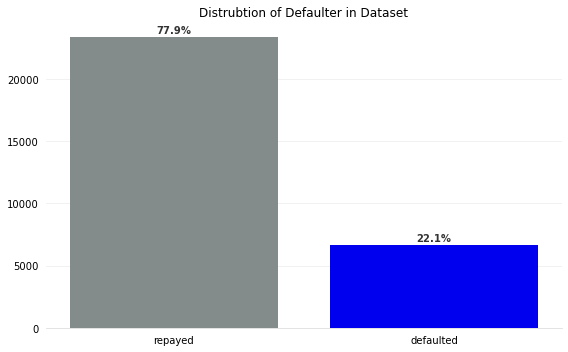

In [11]:
plt.rcParams['figure.figsize'] = (8, 5)
fig, ax = plt.subplots()

out=df['default'].value_counts().reset_index()

bars = ax.bar(x='index', height='default',data=out, color = ['#838B8B','#0000EE'])

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

#writing percentages of each group and its position
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 300,
      (str(round((bar.get_height()/30000)*100, 1))+ '%'),
      horizontalalignment='center',
      color='#333333',
      weight='bold'
  )

#label the graph no need for axis label very obvious
#ax.set_xlabel('')
#ax.set_ylabel('')
ax.set_title('Distrubtion of Defaulter in Dataset')

# Make the chart fill out the figure better.
fig.tight_layout()

As you can see our data is very unevenly spread against defaulters and repayers, with defaulters only making 22.1% of our dataset, This is great news for Taiwan but a problem for our analysis.

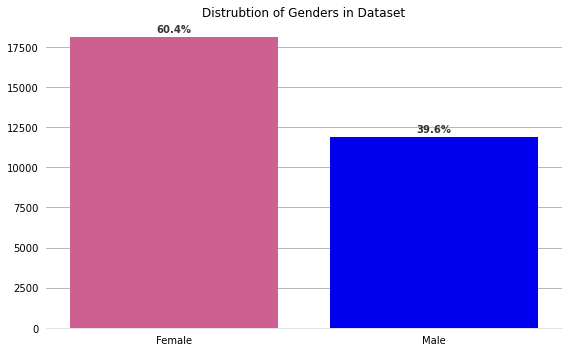

In [12]:
plt.rcParams['figure.figsize'] = (8, 5)
fig, ax = plt.subplots()

out=df['SEX'].value_counts().reset_index()

bars = ax.bar(x='index', height='SEX',data=out, color = ['#CD6090','#0000EE'])

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#A9A9A9')
ax.xaxis.grid(False)


#writing percentages of each group and its position
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 300,
      (str(round((bar.get_height()/30000)*100, 1))+ '%'),
      horizontalalignment='center',
      color='#333333',
      weight='bold'
  )

#label the graph no need for axis label very obvious
#ax.set_xlabel('')
#ax.set_ylabel('')
ax.set_title('Distrubtion of Genders in Dataset')

# Make the chart fill out the figure better.
fig.tight_layout()

The gender ratio is also very surprising with 60% being female, this is especially surprising as the one child policy came out in the 1980’s, and only from this year, which is the first year in 100 years, there are now 100 females for 99 males.

Text(0.5, 1.0, 'Marrital Status')

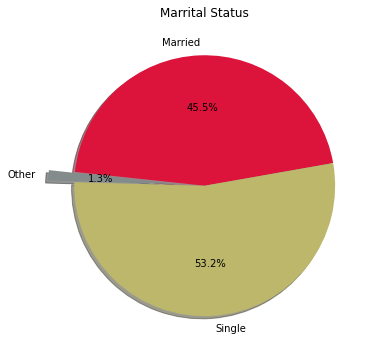

In [18]:
#counting the number in each group
out = (df.groupby('MARRIAGE').count())
labels = ['Married', 'Other', 'Single']
colors = ['#DC143C' ,'#838B8B','#BDB76B']

plt.figure(figsize = (10,6))
plt.pie(out['SEX'], labels = labels, explode = [0, 0.2, 0], startangle = 10, shadow = True, colors = colors, autopct='%1.1f%%')
plt.title("Marrital Status")

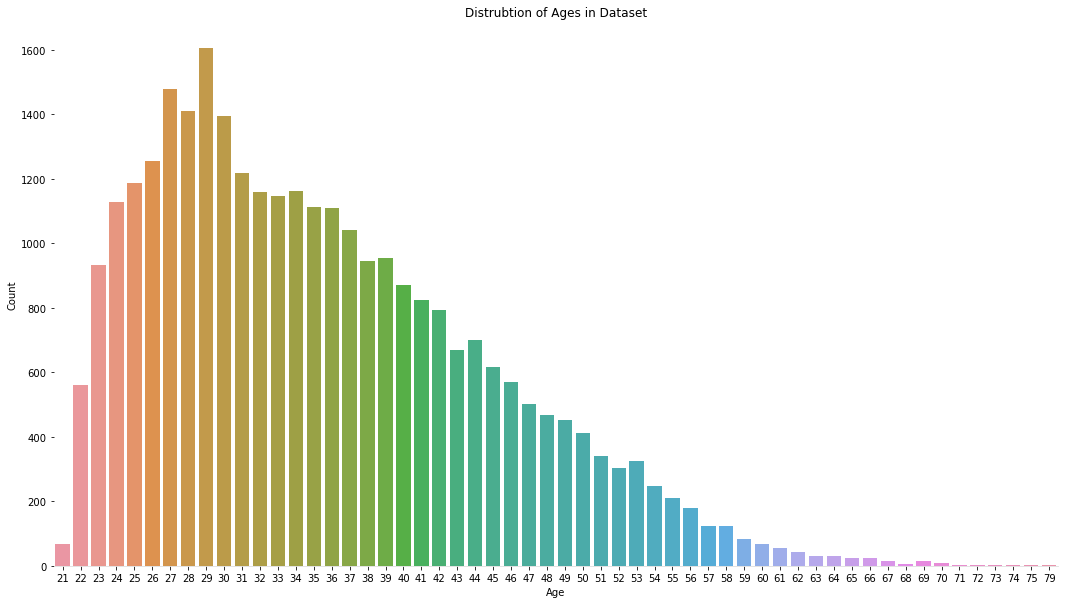

In [19]:
plt.rcParams['figure.figsize'] = (18, 10)
fig, ax = plt.subplots()

age=df['AGE'].value_counts().reset_index()
sns.barplot(x='index',y='AGE',data=age,orient='v')
plt.xlabel("Age")
plt.ylabel("Count")
ax.set_title("Distrubtion of Ages in Dataset")
# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
plt.show()
fig.tight_layout()

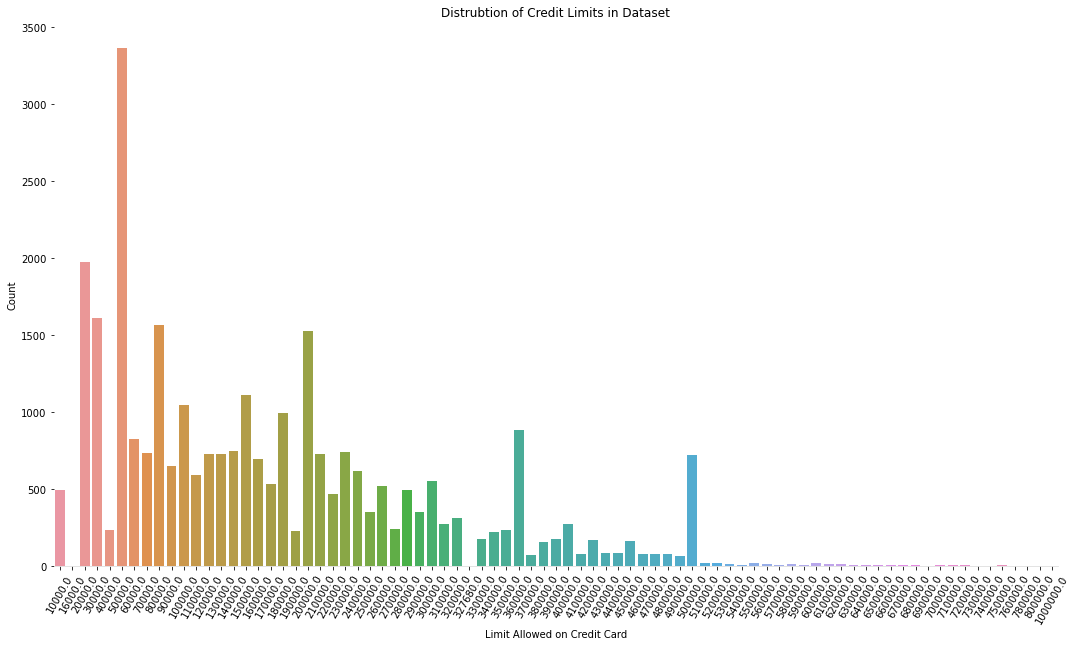

In [20]:
plt.rcParams['figure.figsize'] = (18, 10)
fig, ax = plt.subplots()

lim=df['LIMIT_BAL'].value_counts().reset_index()
sns.barplot(x='index',y='LIMIT_BAL',data=lim,orient='v')
plt.xlabel("Limit Allowed on Credit Card")
plt.ylabel("Count")
plt.xticks(rotation = 60)
ax.set_title("Distrubtion of Credit Limits in Dataset")
# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
plt.show()
fig.tight_layout()

The credit limit is a very interesting graph, showing a right skewed distribution which is what is expected on any finance graph, with very little of the population allowed to get a lot out and the large portion of population only allowed a small amount of credit. The interest part of the graph for me is the large spikes scattered in the distribution, these are likely the main categories that people fit and are allocated the allotted credit, with the smaller parts of the population in between these spikes representing people in unique circumstances that have gone to the bank and received a unique credit allowance.

Text(0.5, 1.0, 'Distrubtion of Credit Allowed')

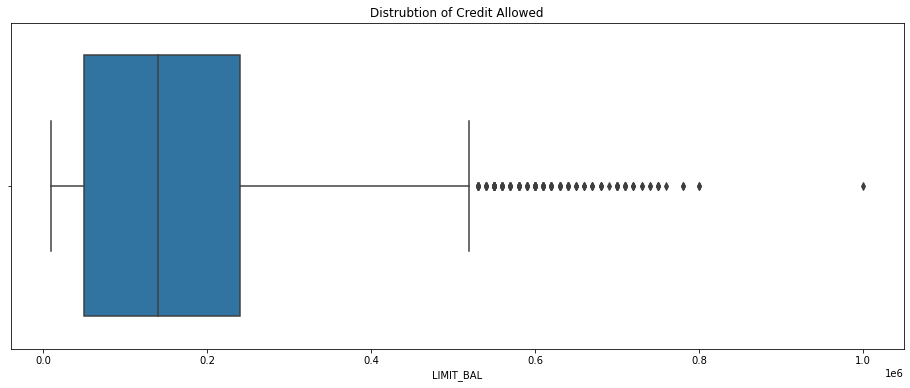

In [25]:
plt.rcParams['figure.figsize'] = (16, 6)
sns.boxplot(df['LIMIT_BAL'], orient = "v")
plt.title("Distrubtion of Credit Allowed")

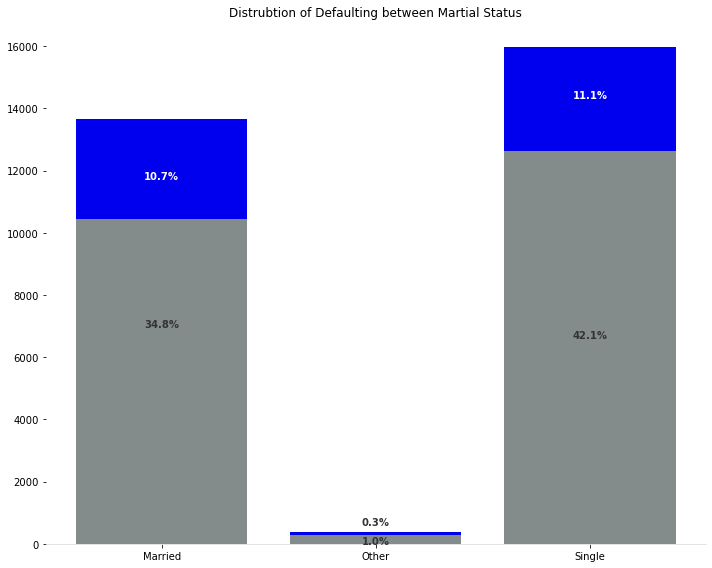

In [93]:
#creating size for graph
plt.rcParams['figure.figsize'] = (10,8)
fig, ax = plt.subplots()
size = []
out = df.groupby(['default','MARRIAGE'])['SEX'].count()
for i in range(len(out)):
    size.append(out[i])
p1 = plt.bar(['Married', 'Other', 'Single'], size[0:3], color = ['#0000EE'], bottom = size[3:6])
p2 = plt.bar(['Married', 'Other', 'Single'], size[3:6], color = ['#838B8B'])
#setting up for positions
bars = p1
barz = p2

#plt.xlabel('Martial Status')
#plt.ylabel('Number of Instances')
ax.set_title('Distrubtion of Defaulting between Martial Status')

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

#labels for percentages and its position
i = 0
for bar in bars:
    i += 1
    if i == 1:
        ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() +8500,
      (str(round((bar.get_height()/30000)*100, 1))+ '%'),
      horizontalalignment='center',
      color='#FFFFFF',
      weight='bold')
    if i == 2:
        ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() +500,
      (str(round((bar.get_height()/30000)*100, 1))+ '%'),
      horizontalalignment='center',
      color='#333333',
      weight='bold')
    if i == 3:
        ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() +11000,
      (str(round((bar.get_height()/30000)*100, 1))+ '%'),
      horizontalalignment='center',
      color='#FFFFFF',
      weight='bold')
        
i = 0
for bar in barz:
    i += 1
    if i == 1:
        ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() -3500,
      (str(round((bar.get_height()/30000)*100, 1))+ '%'),
      horizontalalignment='center',
      color='#333333',
      weight='bold')
    if i == 2:
        ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() -300,
      (str(round((bar.get_height()/30000)*100, 1))+ '%'),
      horizontalalignment='center',
      color='#333333',
      weight='bold')
    if i == 3:
        ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() -6000,
      (str(round((bar.get_height()/30000)*100, 1))+ '%'),
      horizontalalignment='center',
      color='#333333',
      weight='bold')
        

fig.tight_layout()

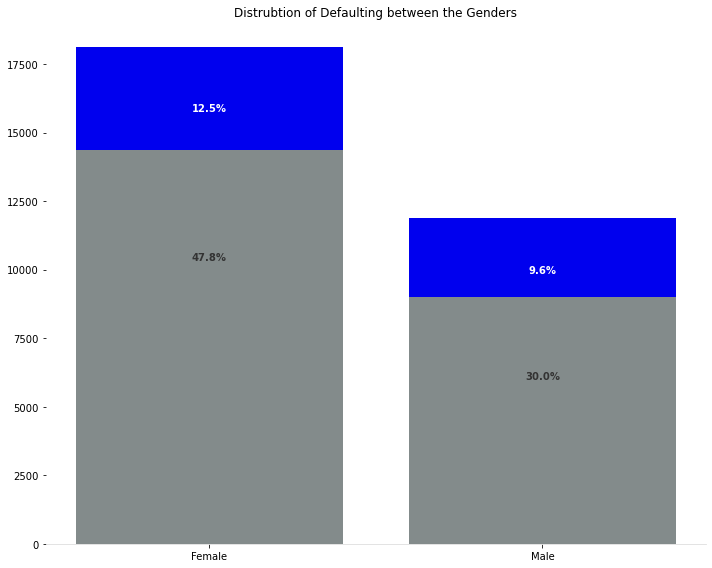

In [89]:
#creating size for graph
plt.rcParams['figure.figsize'] = (10,8)
fig, ax = plt.subplots()
size = []
out = df.groupby(['default','SEX'])['MARRIAGE'].count()
for i in range(len(out)):
    size.append(out[i])
p1 = plt.bar(['Female', 'Male'], size[0:2], color = ['#0000EE'], bottom = size[2:4])
p2 = plt.bar(['Female', 'Male'], size[2:4], color = ['#838B8B'])
#plt.xlabel('Genders')
#plt.ylabel('Number of Instances')
ax.set_title('Distrubtion of Defaulting between the Genders')

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

bars = p1
barz = p2

i = 0
for bar in bars:
    i += 1
    if i == 1:
        ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() +12000,
      (str(round((bar.get_height()/30000)*100, 1))+ '%'),
      horizontalalignment='center',
      color='#FFFFFF',
      weight='bold')
    if i == 2:
        ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() +7000,
      (str(round((bar.get_height()/30000)*100, 1))+ '%'),
      horizontalalignment='center',
      color='#FFFFFF',
      weight='bold')
        
i = 0
for bar in barz:
    i += 1
    if i == 1:
        ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() - 4000,
      (str(round((bar.get_height()/30000)*100, 1))+ '%'),
      horizontalalignment='center',
      color='#333333',
      weight='bold')
    if i == 2:
        ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height()-3000,
      (str(round((bar.get_height()/30000)*100, 1))+ '%'),
      horizontalalignment='center',
      color='#333333',
      weight='bold')

fig.tight_layout()

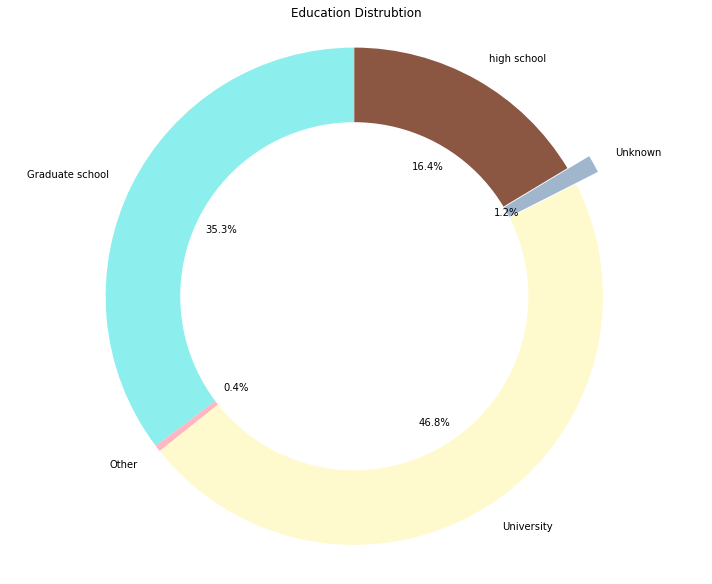

In [96]:
# Pie chart
labels = ['Graduate school', 'Other', 'University', 'Unknown', 'high school']
out = (df.groupby('EDUCATION').count())
sizes = out['MARRIAGE']
#colors
colors = ['#8DEEEE', '#FFB6C1', '#FFFACD', '#9FB6CD', '#8B5742']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, explode = [0, 0, 0, 0.1, 0], autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Education Distrubtion")
plt.show()

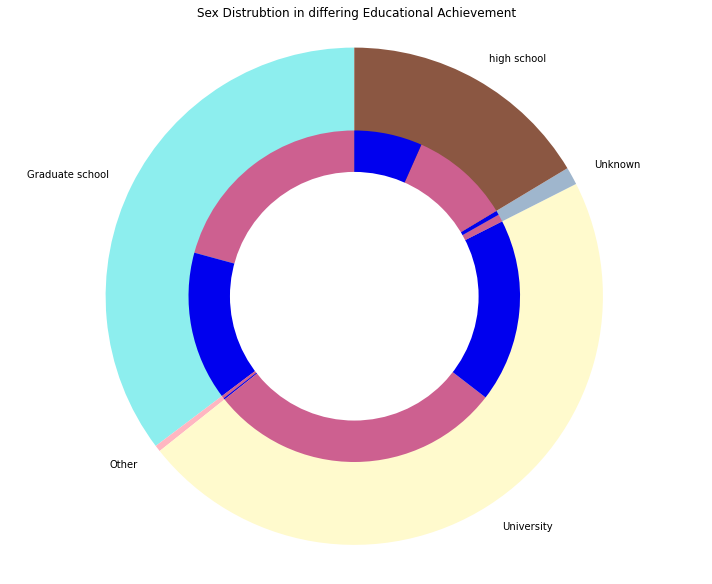

In [95]:
# Data to plot
labels = ['Graduate school', 'Other', 'University', 'Unknown', 'high school']
out = (df.groupby('EDUCATION').count())
sizes = out['MARRIAGE']

labels_gender = ['Female','Male','Female','Male','Female','Male','Female','Male','Female','Male']
size = []
out = df.groupby(['EDUCATION','SEX'])['MARRIAGE'].count()
for i in range(len(out)):
    size.append(out[i])
sizes_gender = size
colors = ['#8DEEEE', '#FFB6C1', '#FFFACD', '#9FB6CD', '#8B5742']
colors_gender = ['#CD6090','#0000EE','#CD6090','#0000EE','#CD6090','#0000EE','#CD6090','#0000EE','#CD6090','#0000EE',]
#explode = (0.2,0.2,0.2,0.2,0.2) 
#explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, radius=3)
plt.pie(sizes_gender,colors=colors_gender,startangle=90,radius=2 )
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.title("Sex Distrubtion in differing Educational Achievement")
plt.show()

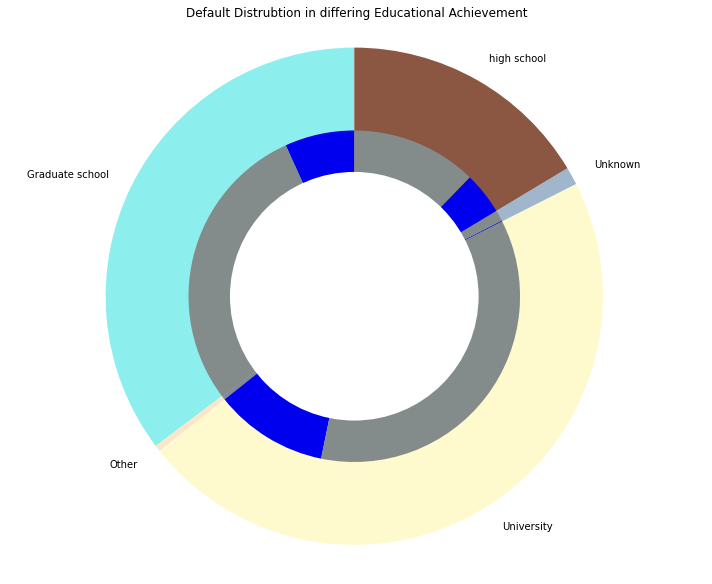

In [34]:
# Data to plot
labels = ['Graduate school', 'Other', 'University', 'Unknown', 'high school']
out = (df.groupby('EDUCATION').count())
sizes = out['MARRIAGE']

labels_gender = ['Female','Male','Female','Male','Female','Male','Female','Male','Female','Male']
size = []
out = df.groupby(['EDUCATION','default'])['MARRIAGE'].count()
for i in range(len(out)):
    size.append(out[i])
sizes_gender = size
colors = ['#8DEEEE', '#FCE6C9', '#FFFACD', '#9FB6CD', '#8B5742']
colors_gender = ['#0000EE', '#838B8B','#0000EE', '#838B8B','#0000EE', '#838B8B','#0000EE', '#838B8B','#0000EE', '#838B8B']
explode = (0.2,0.2,0.2,0.2,0.2) 
explode_gender = (0.175,0.175,0.175,0.175,0.175,0.175,0.175,0.175,0.175,0.175)
#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, radius=3)
plt.pie(sizes_gender,colors=colors_gender,startangle=90,radius=2 )
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.title("Default Distrubtion in differing Educational Achievement")
plt.show()

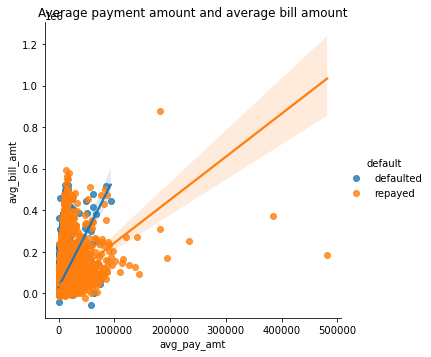

In [97]:
# Adding new Features
df['avg_default'] = df.iloc[:, 5:11].sum(axis=1) / 6 # average default history
df['avg_bill_amt'] = df.iloc[:, 11:17].sum(axis=1) / 6 # average bill amount
df['avg_pay_amt'] = df.iloc[:, 18:24].sum(axis=1) / 6 # average payment amount

# Scatter plot of average payment amount and average bill amount 
sns.lmplot('avg_pay_amt', 'avg_bill_amt', df, hue='default')
fig = plt.gcf()
plt.title("Average payment amount and average bill amount")
plt.show()

#https://www.kaggle.com/code/chiranjeevbit/credit-card-defaulter-end-to-end

[Text(0.5, 1.0, 'Distrubtions of Ages compared by Target')]

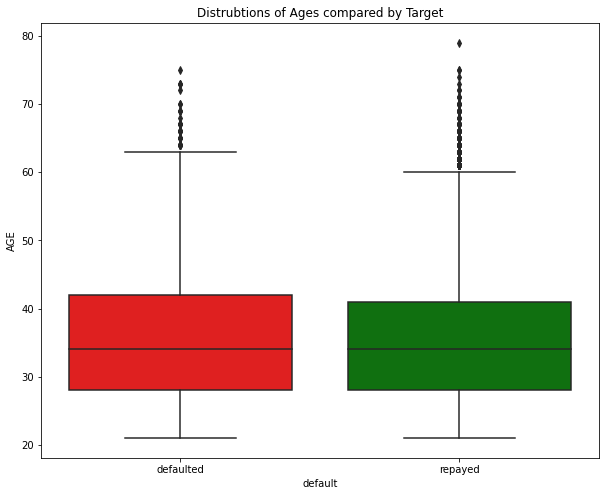

In [98]:
my_pal = {'repayed': "g", 'defaulted': "r"}
sns.boxplot(x='default',y='AGE',data= df, palette = my_pal).set(title = "Distrubtions of Ages compared by Target")

[Text(0.5, 1.0, 'Distrubtions of Ages compared by Target and Martial Status')]

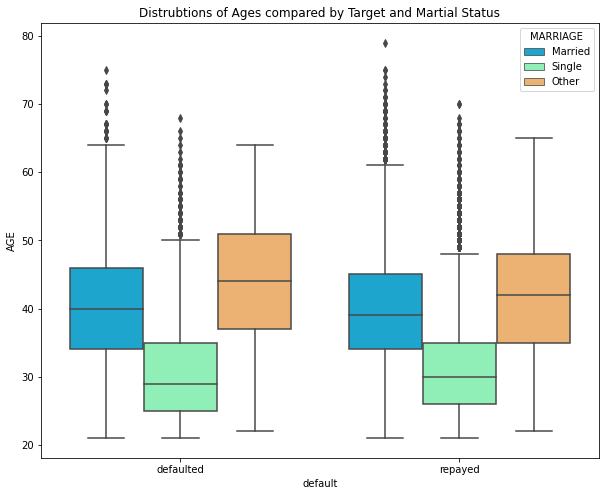

In [99]:
sns.boxplot(x='default',hue='MARRIAGE', y='AGE',data=df ,palette="rainbow").set(title = "Distrubtions of Ages compared by Target and Martial Status")

Reading the box plot we can see that the oldest 75% of single customers are younger than both the youngest 25% of married and other. The boxes between defaulting and repaid are very similar however, so not alot of information can be taken in terms of our target. Only take away is that single people are generally younger than married people in our dataset

## Data Cleaning

In [5]:
#creating a dataframe with only numeric values and another dataframe for only the unknown
data_df = df.copy()

#getting the index of the known educations
unknown = []

for i in range(len(df)):
    if df['EDUCATION'].iloc[i] == 'Unknown':
        data_df['EDUCATION'].iloc[i] = 5
        unknown.append(i)
    if df['EDUCATION'].iloc[i] == 'Other':
        data_df['EDUCATION'].iloc[i] = 4
    if df['EDUCATION'].iloc[i] == 'high school':
        data_df['EDUCATION'].iloc[i] = 3
    if df['EDUCATION'].iloc[i] == 'University':
        data_df['EDUCATION'].iloc[i] = 2
    if df['EDUCATION'].iloc[i] == 'Graduate School':
        data_df['EDUCATION'].iloc[i] = 1

for i in range(len(df)):
    if df['default'].iloc[i] == 'defaulted':
        data_df['default'].iloc[i] = 1
    if df['default'].iloc[i] == 'repayed':
        data_df['default'].iloc[i] = 0

for i in range(len(df)):
    if df['SEX'].iloc[i] == 'Female':
        data_df['SEX'].iloc[i] = 2
    if df['SEX'].iloc[i] == 'Male':
        data_df['SEX'].iloc[i] = 1
        
for i in range(len(df)):
    if df['MARRIAGE'].iloc[i] == 'Other':
        data_df['MARRIAGE'].iloc[i] = 3
    if df['MARRIAGE'].iloc[i] == 'Single':
        data_df['MARRIAGE'].iloc[i] = 2
    if df['MARRIAGE'].iloc[i] == 'Married':
        data_df['MARRIAGE'].iloc[i] = 1

Im not using any one hot encoder as the numeric values do represent a type of 'improvement' in the variable and relates to each other, so no point in giving each varaible its own column

In [6]:
#holding values for comparison after cleaning has been done
before = data_df.copy()
#dropping all unknown rows
data_df.drop(unknown, axis = 0, inplace = True)

### Normalization

The purpose of normalization is to change the values of numeric columns in the data set so a common scale is being used without distorting differences in the ranges of values or losing information.

Normalization gives equal weights/importance to each variable so that no single variable steers model performance in one direction just because they are bigger numbers.

As an example, clustering algorithms use distance measures to determine if an observation should belong to a certain cluster. “Euclidean distance” is often used to measure those distances. If a variable has significantly higher values, it can dominate distance measures, suppressing other variables with small values.

I will be using the MinMaxScaler to normalize my data. MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]. However, this scaling compresses all inliers that belong to a wide spanning variable into an extremely narrow range.
This scaler is also very prone to outliers as the outliers have an influence when computing the empirical mean and standard deviation. Note in particular that because the outliers on each feature have different magnitudes, the spread of the transformed data on each feature is very different

- ref https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

In [7]:
#Function to normalise data
def normalise_data(df):
    df_new = pd.DataFrame()
    for col in df.columns:
        mean = np.mean(df[col])
        std = np.std(df[col])
        df_new[col] = (df[col] - mean) / std
    return df_new

In [8]:
#setting up target and predictor variables for models
x = data_df.drop(columns = 'default', axis=1)
y = data_df['default']

In [9]:
#normalizing variables for machine learning purposes
X = normalise_data(x)
#normalizing whole dataframe to see variables relations in corr()
norm_df = normalise_data(data_df)

In [133]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29655.0,-5.074680e-16,1.000017,-1.213297,-0.905065,-0.211543,0.559038,6.415451
AGE,29655.0,-3.656941e-16,1.000017,-1.570359,-0.810994,-0.160111,0.599253,4.721516
PAY_SEPT,29655.0,5.068916e-15,1.000017,-1.765264,-0.875415,0.014433,0.014433,7.133222
PAY_AUG,29655.0,-9.157187e-16,1.000017,-1.559168,-0.724080,0.111007,0.111007,6.791706
PAY_JUL,29655.0,2.819379e-16,1.000017,-1.532632,-0.697227,0.138178,0.138178,6.821415
PAY_JUN,29655.0,5.097554e-17,1.000017,-1.521938,-0.666967,0.188004,0.188004,7.027774
PAY_MAY,29655.0,-3.361217e-15,1.000017,-1.530368,-0.647927,0.234514,0.234514,7.294044
PAY_APR,29655.0,2.977161e-15,1.000017,-1.485956,-0.616718,0.252520,0.252520,7.206423
BILL_AMT_SEPT,29655.0,-2.589255e-16,1.000017,-2.942337,-0.647139,-0.391765,0.215895,12.391833
BILL_AMT_AUG,29655.0,1.152966e-16,1.000017,-1.670221,-0.648981,-0.392896,0.208331,13.117927


In [134]:
#monotonic function
norm_df.corr(method='spearman').abs()

,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,avg_default,avg_bill_amt,avg_pay_amt
LIMIT_BAL,1.000000,0.186833,0.296029,0.342749,0.330746,0.308608,0.285095,0.264351,0.054363,0.049217,...,0.087932,0.272877,0.278473,0.284351,0.283634,0.293501,0.317092,0.363244,0.091874,0.393349
AGE,0.186833,1.000000,0.063484,0.083574,0.083700,0.080953,0.083691,0.076470,0.001044,0.001842,...,0.000051,0.034018,0.044146,0.033274,0.040807,0.037463,0.038772,0.086019,0.003191,0.045123
PAY_SEPT,0.296029,0.063484,1.000000,0.626595,0.547325,0.515637,0.485785,0.463140,0.314385,0.329170,...,0.289038,0.099137,0.064184,0.054443,0.034233,0.025944,0.045081,0.687926,0.320011,0.101447
PAY_AUG,0.342749,0.083574,0.626595,1.000000,0.799160,0.712445,0.672884,0.633907,0.570898,0.550511,...,0.458972,0.019243,0.082323,0.087234,0.094551,0.099224,0.082197,0.849078,0.533536,0.029477
PAY_JUL,0.330746,0.083700,0.547325,0.799160,1.000000,0.800787,0.718201,0.671007,0.523802,0.588102,...,0.484758,0.215025,0.035980,0.103545,0.118462,0.124312,0.098951,0.866815,0.544714,0.031714
PAY_JUN,0.308608,0.080953,0.515637,0.712445,0.800787,1.000000,0.821590,0.731093,0.512027,0.557944,...,0.533214,0.185472,0.245451,0.069094,0.144442,0.161416,0.142920,0.865484,0.569070,0.105052
PAY_MAY,0.285095,0.083691,0.485785,0.672884,0.718201,0.821590,1.000000,0.820562,0.498565,0.537265,...,0.579191,0.175435,0.221340,0.260616,0.106760,0.184627,0.172261,0.849357,0.578749,0.150096
PAY_APR,0.264351,0.076470,0.463140,0.633907,0.671007,0.731093,0.820562,1.000000,0.487707,0.523062,...,0.629892,0.177087,0.198452,0.237712,0.284345,0.140867,0.198133,0.827523,0.576979,0.178708
BILL_AMT_SEPT,0.054363,0.001044,0.314385,0.570898,0.523802,0.512027,0.498565,0.487707,1.000000,0.911535,...,0.734161,0.502067,0.471352,0.440233,0.441990,0.424652,0.410297,0.532676,0.923330,0.441321
BILL_AMT_AUG,0.049217,0.001842,0.329170,0.550511,0.588102,0.557944,0.537265,0.523062,0.911535,1.000000,...,0.765258,0.635464,0.497224,0.468154,0.461172,0.448859,0.429567,0.569113,0.935955,0.453931


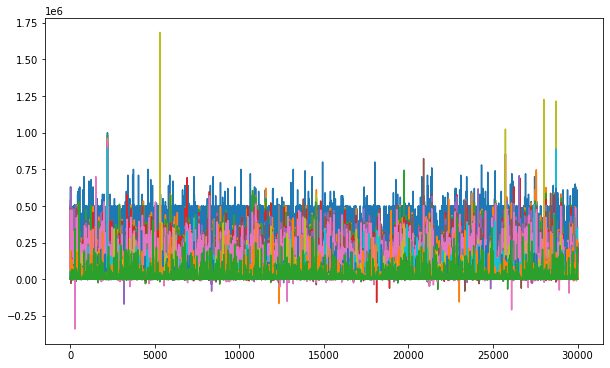

In [12]:
#spread of untreated data
plt.rcParams['figure.figsize']=(10,6)
plt.plot(before.drop(columns = 'default'))
plt.show()

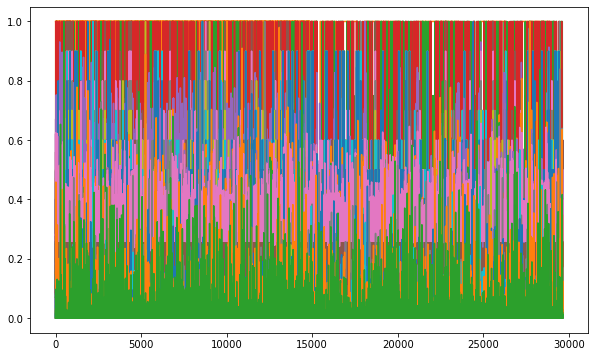

In [13]:
#spread of all known and normalized data
plt.rcParams['figure.figsize']=(10,6)
plt.plot(X)
plt.show()

### Local Outlier Factor

I will be using local outlier factor as my unsupervised anomaly detection method. The local outlier factor works by computing the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors.

The main optimization we can apply to the LocalOutlierFactor function is n_neighbors and contamination

To calculate a good number for n neighbors we can find the amount that each cluster should have.

The total number of values(30,000) / Number of clusters(2)

giving us n = 15,000

Contamination is the amount of the dataset that you think is an outlier.

Sklearns automatically asigns this value to be 0.1 so 10% of the data. I feel that number is a bit to high and will be using 0.1% so 0.001

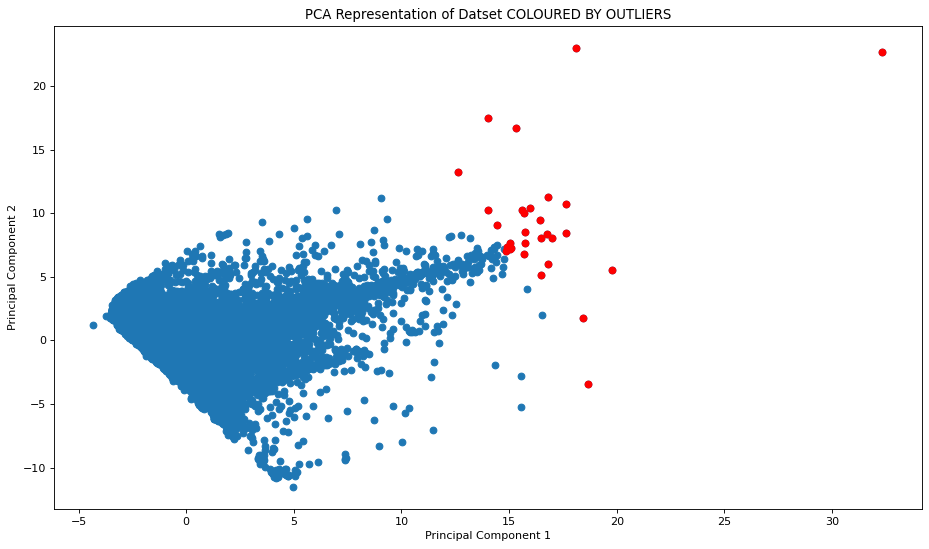

In [10]:
#PCA for visualisation
graph_pca = PCA(n_components = 2)
principalComponents = graph_pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

#initializing the function
clf = LocalOutlierFactor(n_neighbors=15000, contamination=0.001)
#fitting the data
y_pred = clf.fit_predict(principalDf)
#all negative values are considered to be outliers
lofs_index = np.where(y_pred==-1)
#storing all outliers
values = principalDf.iloc[lofs_index]

#plotting the outliers
plt.figure(figsize=(14, 8), dpi=80)
plt.scatter(y = principalDf['principal component 2'], x = principalDf['principal component 1'])
plt.scatter(y = values['principal component 2'], x = values['principal component 1'], c = 'r')
plt.title("PCA Representation of Datset COLOURED BY OUTLIERS")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [11]:
#seeing proportions that have defaulted in 'outliers'
y.iloc[lofs_index].value_counts()

0    21
1     9
Name: default, dtype: int64

In [12]:
#taking the outliers out, axis = 0 refers to the rows being taken out
for values, index in enumerate(lofs_index):
    clean_df = norm_df.drop(index, axis = 0)
cleany = clean_df['default']
cleanX = clean_df.drop(columns = 'default', axis=1)

In [13]:
#taking the outliers out, axis = 0 refers to the rows being taken out
for values, index in enumerate(lofs_index):
    cleanpca = principalDf.drop(index, axis = 0)
cleanpca

,principal component 1,principal component 2
0,-1.891339,-0.903438
1,-0.774841,-2.118409
2,-0.854293,-1.076185
3,-0.198721,-0.804975
4,-0.835380,-0.069080
...,...,...
29650,2.527606,0.705611
29651,-1.778594,-0.051670
29652,0.348980,-3.325499
29653,0.673758,0.731926


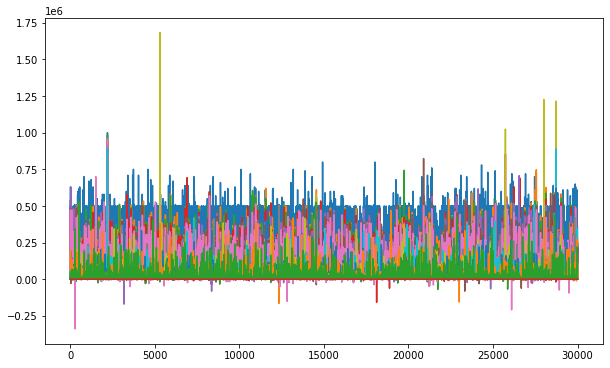

In [15]:
#spread of all known and normalized data
plt.rcParams['figure.figsize']=(10,6)
plt.plot(before)
plt.show()

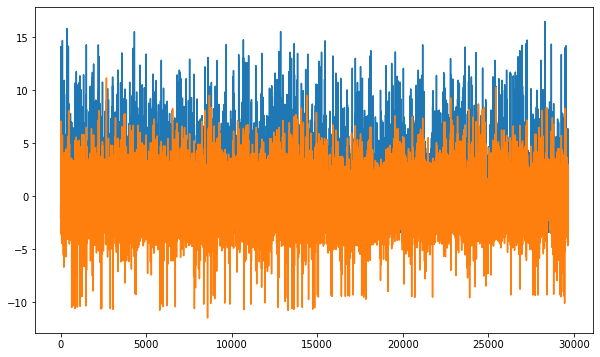

In [21]:
#spread of data after outlier factor
plt.rcParams['figure.figsize']=(10,6)

plt.plot(cleanpca)
plt.show()

## Unsupervised learning

### K Means

K-Means clustering is generally used on numerical data to solve classification problems. Its main goal is to group similar elements or data points together into pre-defined, non-overlapping clusters where each data point belongs to only one group.

In unsupervised learning, there is no target variable. The dataset only has input variables which describe the data. This is called unsupervised learning.

Normally when implimenting this model you have an idea of how many subgroups you are looking for.
The “K” in K-Means represent the number of centroid and in this case we will set K = 2 as you can either repay or default.

A centroid is a data point at the centre of a cluster, where this centre is iteratively recalculated using the smallest amount of guassian distance between all clustered points.

If the number of centroids is unknown a technique called the elbow method can be used. This method plots the average distance between points and centroid by the number of centroids. The most optimal value of centroids is the smallest distance with the smallest number of centroids. This can be seen graphically in the most bottom left point in the graph.

I will use this technique later to find if our model is accurately prediciting that this method is comprised of 2 main groups of customers, high risk, and low risk.

It is very important that you normalize and scale your values when using K-means. K-means clustering is "isotropic" in all directions of space and therefore tends to produce more or less round (rather than elongated) clusters. In this situation leaving variances unequal is equivalent to putting more weight on variables with smaller variance, so clusters will tend to be separated along variables with greater variance.

https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering
    
n_clusters sets k for the clustering step. This is the most important parameter for k-means.

n_init sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

max_iter sets the number of maximum iterations for each initialization of the k-means algorithm.

In [14]:
#setting enviroment for K-means
kmeans = KMeans(n_clusters=2, random_state=42)
#fitting to our data
kmeans.fit(cleanpca)

KMeans(n_clusters=2, random_state=42)

In [15]:
clusters = pd.DataFrame({'Classification': kmeans.labels_})
cleanfinalDf = cleanpca.join(clusters)

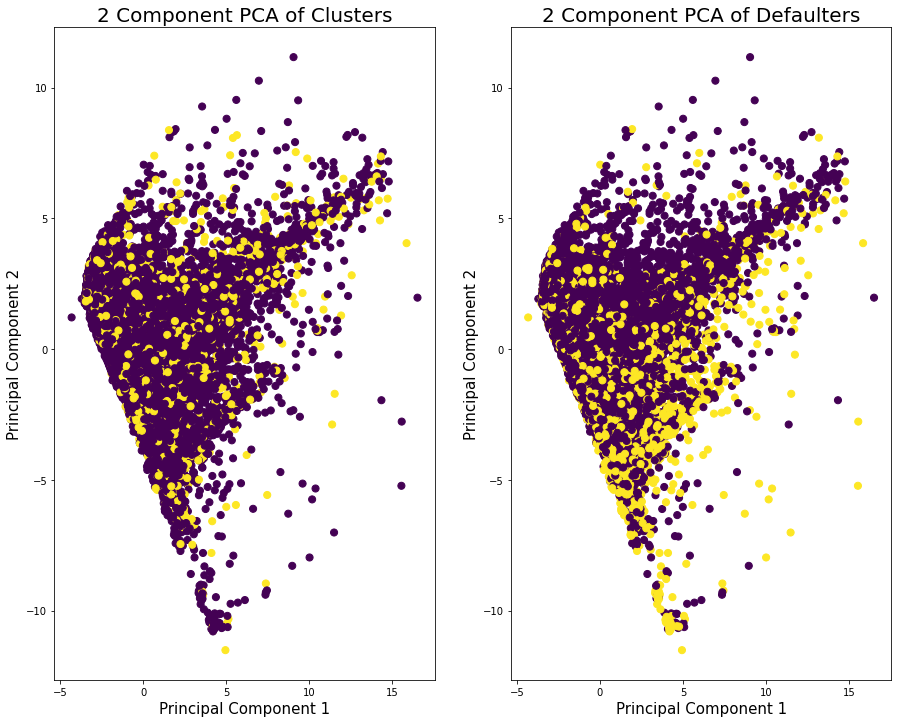

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
plt.subplot(1,2,1) 
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 Component PCA of Clusters', fontsize = 20)
plt.scatter(cleanfinalDf['principal component 1']
               , cleanfinalDf['principal component 2']
               , c = cleanfinalDf['Classification']
               , s = 50)

plt.subplot(1,2,2)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 Component PCA of Defaulters', fontsize = 20)
plt.scatter(cleanfinalDf['principal component 1']
               , cleanfinalDf['principal component 2']
               , c = cleany
               , s = 50)

In [17]:
#converting from normalized values back to binary
le = preprocessing.LabelEncoder()
y = le.fit_transform(cleany)

In [18]:
#unsure why there are na values 
cleanfinalDf['Classification'] = cleanfinalDf['Classification'].fillna(2)

## Evaluation 

A precision score is used to measure the model performance in measuring the count of true positives in the correct manner out of all positive predictions made. In our case this wont give us much information because we can gain very high precision just through a function that says all customers will be repayers and we will get 80% precision

Recall score is used to measure the models performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. This is a good evaluator for looking at our defaulter recall seeing RAhow many we got right

Accuracy score is used to measure the model performance in terms of measuring the ratio of sum of true positive and true negatives out of all the predictions made. This also good evaluator but our unbalanced dataset will also sway this value much like precision

The score I will focus on is the F1-score, it is a harmonic mean of precision and recall score and is used as a metrics in the scenarios where choosing either of precision or recall score can result in compromise in terms of model giving high false positives and false negatives respectively.


In [19]:
print("Classification Report for K Means Model: \n", classification_report(y, cleanfinalDf['Classification']))

Classification Report for K Means Model: 
               precision    recall  f1-score   support

         0.0       0.78      0.84      0.81     23070
         1.0       0.24      0.17      0.20      6555
         2.0       0.00      0.00      0.00         0

    accuracy                           0.69     29625
   macro avg       0.34      0.34      0.34     29625
weighted avg       0.66      0.69      0.67     29625



Interestingly got NaN values, not surprisingly the unsupervised model is a very inaccruate model to be used in this situation with uneven and irregular clusters.

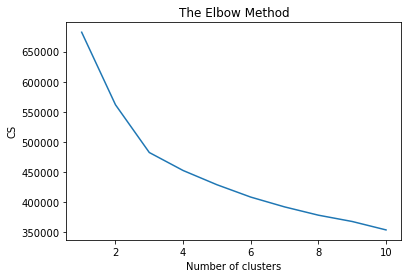

In [143]:
cs = []
for i in range(1, 11):
    kmeans_elb = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans_elb.fit(X)
    cs.append(kmeans_elb.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [144]:
kl = KneeLocator(range(1, 11), cs, curve="convex", direction="decreasing")
kl.elbow

3

I expected that I would get 2 clusters, being defaulters and non-defaulter, however I got 3, I suspect this is caused by one of my limitations on having the minimum amount of time where the 3 group could be highly likely defaulters in the future.

## PCA

As discussed before most models use some sort of  ‘Euclidean distance’ between each data point to classify into like groups. When I try to visualised this process in my head I can manage a 2-d graph and take distances. I can also take it to 3-D , but 4-D is hard. The machine also has this problem, so this distance functions usefulness degrades with a higher number of dimensions which is called the curse of dimensionality. We can then try to reduce the number of dimensions through PCA which takes linearly independent eigenvectors of multiple variables to represent one new PCA variable. However there is a trade-off between the variance in the target variable that can be explained through our predictor variables and the number of PCA variables chosen.

In [20]:
pca = PCA()

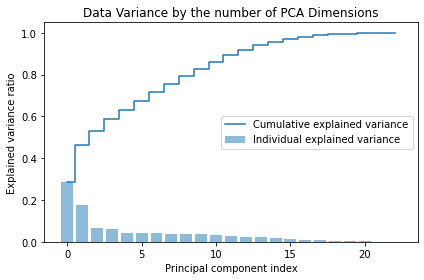

In [21]:
# Scale the dataset; This is very important before you apply PCA

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(cleanX)
X_std = sc.transform(cleanX)
#
# Instantiate PCA
#
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X_std)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title("Data Variance by the number of PCA Dimensions")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [22]:
#getting 95% of the datas variance
pca = PCA(n_components = 0.95)
reduced = pca.fit_transform(cleanX)
np.shape(reduced)

(29625, 15)

For 95% of the variance to be explained we only need 15 variables instead of the 23 that we previously had, This will greatly improve our models as most of our classifers have the curse of dimensionality

In [23]:
columns = []
for i in range(15):
    columns.append("Principal component " + str(i+1))
reduced_X = pd.DataFrame(data = reduced, columns = columns)
reduced_X.isna().sum()

Principal component 1     0
Principal component 2     0
Principal component 3     0
Principal component 4     0
Principal component 5     0
Principal component 6     0
Principal component 7     0
Principal component 8     0
Principal component 9     0
Principal component 10    0
Principal component 11    0
Principal component 12    0
Principal component 13    0
Principal component 14    0
Principal component 15    0
dtype: int64

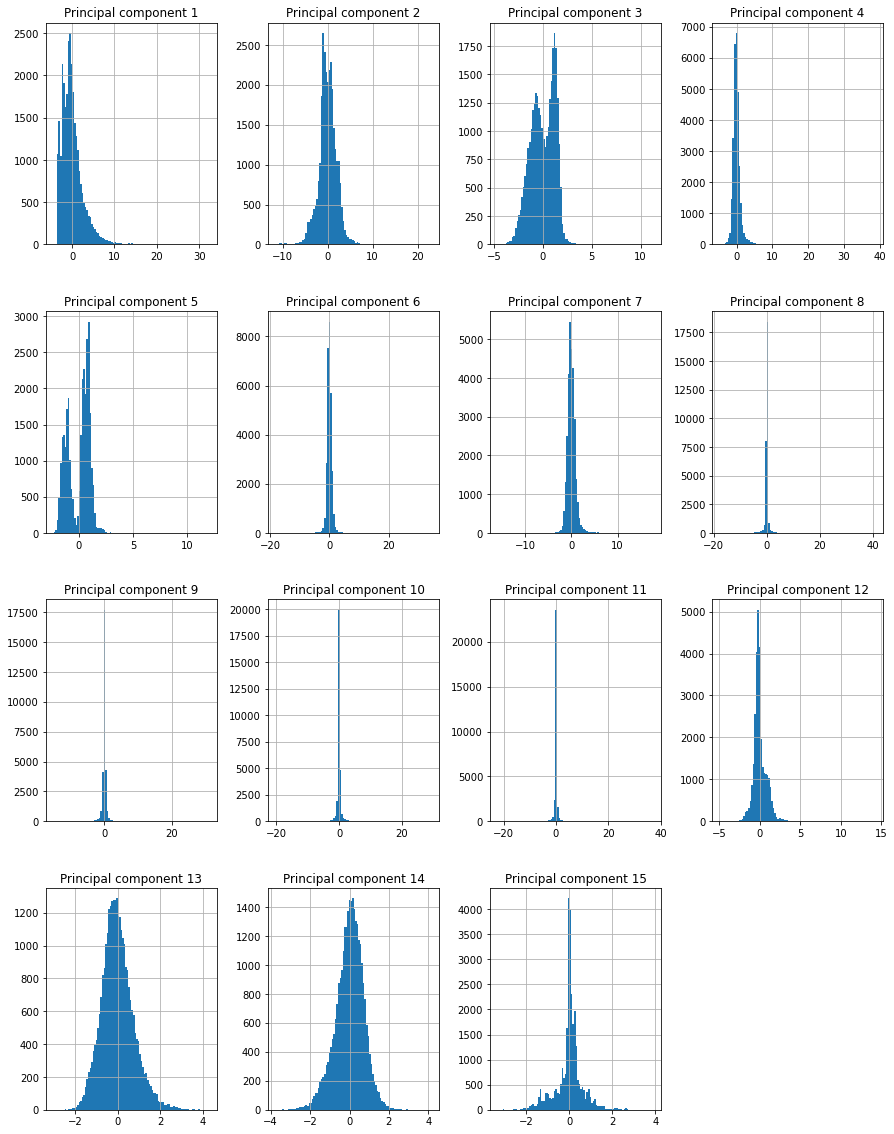

In [19]:
reduced_X.hist(bins = 100, figsize = (15, 20))
plt.show()

## Test Train Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(reduced_X, y, test_size=0.3, random_state=42, stratify = y)

### Undersampling

In [25]:
df_y = pd.DataFrame(data = y, columns = ['Default'])

In [26]:
reduced_df = reduced_X.join(df_y)

In [27]:
reduced_df

,Principal component 1,Principal component 2,Principal component 3,Principal component 4,Principal component 5,Principal component 6,Principal component 7,Principal component 8,Principal component 9,Principal component 10,Principal component 11,Principal component 12,Principal component 13,Principal component 14,Principal component 15,Default
0,-1.891926,-0.902568,-0.203944,-0.860323,0.922132,-0.077899,0.340736,0.040660,-0.807236,0.352850,0.172592,3.216457,-0.965086,-0.309039,-0.194460,1
1,-0.775723,-2.118636,1.182366,0.079200,0.863781,-0.275054,0.064097,-0.102423,0.204213,-0.014389,0.168444,-0.841150,0.060963,-0.286884,0.430119,1
2,-0.854914,-1.076179,0.555412,-0.223070,0.767962,0.031546,0.122769,-0.174666,-0.048527,0.098717,0.070115,-0.298494,0.478083,0.354283,0.013407,0
3,-0.198954,-0.805166,-0.872417,-0.197248,0.903174,-0.231862,-0.298597,0.076080,0.068834,-0.054425,0.014362,0.035277,-0.751829,0.456745,0.055619,0
4,-0.835422,-0.068926,-2.055138,1.485426,-0.999216,0.692346,-0.054004,0.671549,0.835978,-0.650551,1.017069,-0.477316,-0.008598,1.338278,0.225440,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29620,2.527680,0.704415,-1.700497,-0.398020,-0.492955,1.552532,0.207952,0.004489,-0.146913,-0.283386,0.226523,-0.080224,-0.478205,-0.902514,0.280042,0
29621,-1.778892,-0.051288,-0.651291,0.189834,-0.754041,1.164607,1.146402,-0.150073,0.730368,0.176348,0.119559,-1.323770,0.724241,-0.083157,-0.363257,0
29622,0.347167,-3.325072,0.229147,0.557040,-1.341357,0.078211,1.207694,-0.117929,-0.049146,1.093468,0.156216,3.244329,1.071960,0.111507,-0.539072,1
29623,0.673897,0.732510,-0.927417,2.865359,-0.035066,2.669348,0.400013,0.499149,-0.903396,-0.561703,-4.713047,0.796978,-0.819067,0.116249,-1.046334,1


In [28]:
# Divide data into defaulters and repayers
df_class_0 = reduced_df[reduced_df['Default'] == 0]
df_class_1 = reduced_df[reduced_df['Default'] == 1]
print("Value count for repayers: ", df_class_0['Default'].value_counts()[0], " Value count for defaulters: ", df_class_1['Default'].value_counts()[1])

Value count for repayers:  23070  Value count for defaulters:  6555


In [29]:
#Take same number of data points from repayers as defaulters
undersample = df_class_0.sample(np.shape(df_class_1)[0])
#combine defaulters and repayers for a new train test split
undersampled = pd.concat([undersample, df_class_1], axis = 0)

#convert to X and y for
under_y = undersampled['Default']
under_X = undersampled.drop(columns = 'Default', axis=1)

In [30]:
under_y.value_counts()

0    6555
1    6555
Name: Default, dtype: int64

In [31]:
Xtrain, notused, ytrain, nouse = train_test_split(under_X, under_y, test_size=0.3, random_state=42, stratify = under_y)

In [32]:
ytrain1 = np.array(ytrain)
rytrain = ytrain1.reshape(-1, 1)

### Multiple Undersamples

In [33]:
#creating an uneven number of subsamples making repaid and deafult even
first = pd.concat([df_class_0.iloc[0:4613], df_class_1.sample(4613)], axis = 0)
second = pd.concat([df_class_0.iloc[4615:9228], df_class_1.sample(4613)], axis = 0)
third = pd.concat([df_class_0.iloc[9229:13842], df_class_1.sample(4613)], axis = 0)
fourth = pd.concat([df_class_0.iloc[13843:18456], df_class_1.sample(4613)], axis = 0)
fifth = pd.concat([df_class_0.iloc[18457:], df_class_1.sample(4613)], axis = 0)
X1 = first.drop(columns = 'Default', axis=1)
y1 = first['Default']
X2 = second.drop(columns = 'Default', axis=1)
y2 = second['Default']
X3 = third.drop(columns = 'Default', axis=1)
y3 = third['Default']
X4 = fourth.drop(columns = 'Default', axis=1)
y4 = fourth['Default']
X5 = fifth.drop(columns = 'Default', axis=1)
y5 = fifth['Default']

In [34]:
#function to get average prediction on all 5 models
def ensembled(one, two, three, four, five, y_test):
    ensembled_preds = []
    for i in range(len(one)):
        #uneven subsamples so there is a decider value
        av = one[i] + two[i] + three[i] + four[i] + five[i]
        if av > 2:
            ensembled_preds.append(1)
        else:
            ensembled_preds.append(0)
    print("Classification Report for Neural Network: \n", classification_report(y_test, ensembled_preds))

## Artifical Neural Network

In [44]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(15, input_dim=15, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        history = model.fit(X_train, y_train, epochs=100)
    else:
        history = model.fit(X_train, y_train, epochs=100, class_weight = weights)
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    predictions = []
    for i in range(len(y_preds)):
        #more senstive towards defaulters
        if y_preds[i] >=0.45:
            predictions.append(int(1))
        else:
            predictions.append(int(0))
    
    print("Classification Report for Neural Network: \n", classification_report(y_test, predictions))
    return predictions

In [192]:
#for full dataset
predictions = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
649/649 [==============================] - 1s 729us/step - loss: 0.5455 - accuracy: 0.7505
Epoch 2/100
649/649 [==============================] - 0s 719us/step - loss: 0.4586 - accuracy: 0.8143
Epoch 3/100
649/649 [==============================] - 0s 724us/step - loss: 0.4512 - accuracy: 0.8143
Epoch 4/100
649/649 [==============================] - 0s 724us/step - loss: 0.4461 - accuracy: 0.8174
Epoch 5/100
649/649 [==============================] - 0s 730us/step - loss: 0.4425 - accuracy: 0.8190
Epoch 6/100
649/649 [==============================] - 0s 722us/step - loss: 0.4394 - accuracy: 0.8204
Epoch 7/100
649/649 [==============================] - 0s 735us/step - loss: 0.4361 - accuracy: 0.8219
Epoch 8/100
649/649 [==============================] - 0s 730us/step - loss: 0.4352 - accuracy: 0.8209
Epoch 9/100
649/649 [==============================] - 0s 727us/step - loss: 0.4340 - accuracy: 0.8214
Epoch 10/100
649/649 [==============================] - 0s 727us/step - l

In [45]:
#predictions for undersampled dataset
predictions = ANN(Xtrain, rytrain, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
287/287 [==============================] - 1s 707us/step - loss: 0.6312 - accuracy: 0.6333
Epoch 2/100
287/287 [==============================] - 0s 707us/step - loss: 0.5987 - accuracy: 0.6852
Epoch 3/100
287/287 [==============================] - 0s 699us/step - loss: 0.5897 - accuracy: 0.6922
Epoch 4/100
287/287 [==============================] - 0s 698us/step - loss: 0.5845 - accuracy: 0.6951
Epoch 5/100
287/287 [==============================] - 0s 704us/step - loss: 0.5804 - accuracy: 0.7020
Epoch 6/100
287/287 [==============================] - 0s 699us/step - loss: 0.5775 - accuracy: 0.7030
Epoch 7/100
287/287 [==============================] - 0s 694us/step - loss: 0.5745 - accuracy: 0.7021
Epoch 8/100
287/287 [==============================] - 0s 695us/step - loss: 0.5728 - accuracy: 0.7063
Epoch 9/100
287/287 [==============================] - 0s 707us/step - loss: 0.5705 - accuracy: 0.7065
Epoch 10/100
287/287 [==============================] - 0s 720us/step - l

287/287 [==============================] - 0s 710us/step - loss: 0.5418 - accuracy: 0.7254
Epoch 80/100
287/287 [==============================] - 0s 696us/step - loss: 0.5415 - accuracy: 0.7262
Epoch 81/100
287/287 [==============================] - 0s 704us/step - loss: 0.5409 - accuracy: 0.7273
Epoch 82/100
287/287 [==============================] - 0s 699us/step - loss: 0.5411 - accuracy: 0.7250
Epoch 83/100
287/287 [==============================] - 0s 702us/step - loss: 0.5415 - accuracy: 0.7242
Epoch 84/100
287/287 [==============================] - 0s 716us/step - loss: 0.5410 - accuracy: 0.7265
Epoch 85/100
287/287 [==============================] - 0s 707us/step - loss: 0.5420 - accuracy: 0.7250
Epoch 86/100
287/287 [==============================] - 0s 706us/step - loss: 0.5404 - accuracy: 0.7262
Epoch 87/100
287/287 [==============================] - 0s 765us/step - loss: 0.5409 - accuracy: 0.7266
Epoch 88/100
287/287 [==============================] - 0s 776us/step - loss:

In [214]:
predictions1 = ANN(X1, y1, X_test, y_test, 'binary_crossentropy', -1)
predictions2 = ANN(X2, y2, X_test, y_test, 'binary_crossentropy', -1)
predictions3 = ANN(X3, y3, X_test, y_test, 'binary_crossentropy', -1)
predictions4 = ANN(X4, y4, X_test, y_test, 'binary_crossentropy', -1)
predictions5 = ANN(X5, y5, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
289/289 [==============================] - 1s 722us/step - loss: 0.6434 - accuracy: 0.6400
Epoch 2/100
289/289 [==============================] - 0s 705us/step - loss: 0.6041 - accuracy: 0.6818
Epoch 3/100
289/289 [==============================] - 0s 703us/step - loss: 0.5968 - accuracy: 0.6865
Epoch 4/100
289/289 [==============================] - 0s 708us/step - loss: 0.5931 - accuracy: 0.6918
Epoch 5/100
289/289 [==============================] - 0s 714us/step - loss: 0.5896 - accuracy: 0.6933
Epoch 6/100
289/289 [==============================] - 0s 712us/step - loss: 0.5872 - accuracy: 0.6942
Epoch 7/100
289/289 [==============================] - 0s 712us/step - loss: 0.5845 - accuracy: 0.6933
Epoch 8/100
289/289 [==============================] - 0s 698us/step - loss: 0.5822 - accuracy: 0.6952
Epoch 9/100
289/289 [==============================] - 0s 705us/step - loss: 0.5802 - accuracy: 0.6953
Epoch 10/100
289/289 [==============================] - 0s 705us/step - l

289/289 [==============================] - 0s 702us/step - loss: 0.5528 - accuracy: 0.7132
Epoch 53/100
289/289 [==============================] - 0s 698us/step - loss: 0.5524 - accuracy: 0.7142
Epoch 54/100
289/289 [==============================] - 0s 702us/step - loss: 0.5524 - accuracy: 0.7139
Epoch 55/100
289/289 [==============================] - 0s 702us/step - loss: 0.5516 - accuracy: 0.7137
Epoch 56/100
289/289 [==============================] - 0s 698us/step - loss: 0.5514 - accuracy: 0.7143
Epoch 57/100
289/289 [==============================] - 0s 695us/step - loss: 0.5513 - accuracy: 0.7132
Epoch 58/100
289/289 [==============================] - 0s 702us/step - loss: 0.5517 - accuracy: 0.7119
Epoch 59/100
289/289 [==============================] - 0s 702us/step - loss: 0.5507 - accuracy: 0.7134
Epoch 60/100
289/289 [==============================] - 0s 695us/step - loss: 0.5508 - accuracy: 0.7161
Epoch 61/100
289/289 [==============================] - 0s 703us/step - loss:

Epoch 1/100
289/289 [==============================] - 1s 740us/step - loss: 0.6595 - accuracy: 0.6377
Epoch 2/100
289/289 [==============================] - 0s 715us/step - loss: 0.5695 - accuracy: 0.7119
Epoch 3/100
289/289 [==============================] - 0s 719us/step - loss: 0.5527 - accuracy: 0.7237
Epoch 4/100
289/289 [==============================] - 0s 705us/step - loss: 0.5460 - accuracy: 0.7310
Epoch 5/100
289/289 [==============================] - 0s 712us/step - loss: 0.5416 - accuracy: 0.7305
Epoch 6/100
289/289 [==============================] - 0s 702us/step - loss: 0.5387 - accuracy: 0.7320
Epoch 7/100
289/289 [==============================] - 0s 705us/step - loss: 0.5363 - accuracy: 0.7356
Epoch 8/100
289/289 [==============================] - 0s 702us/step - loss: 0.5344 - accuracy: 0.7370
Epoch 9/100
289/289 [==============================] - 0s 698us/step - loss: 0.5322 - accuracy: 0.7368
Epoch 10/100
289/289 [==============================] - 0s 698us/step - l

289/289 [==============================] - 0s 702us/step - loss: 0.5271 - accuracy: 0.7354
Epoch 53/100
289/289 [==============================] - 0s 702us/step - loss: 0.5265 - accuracy: 0.7322
Epoch 54/100
289/289 [==============================] - 0s 712us/step - loss: 0.5260 - accuracy: 0.7340
Epoch 55/100
289/289 [==============================] - 0s 705us/step - loss: 0.5261 - accuracy: 0.7351
Epoch 56/100
289/289 [==============================] - 0s 698us/step - loss: 0.5253 - accuracy: 0.7346
Epoch 57/100
289/289 [==============================] - 0s 702us/step - loss: 0.5255 - accuracy: 0.7340
Epoch 58/100
289/289 [==============================] - 0s 708us/step - loss: 0.5256 - accuracy: 0.7344
Epoch 59/100
289/289 [==============================] - 0s 708us/step - loss: 0.5255 - accuracy: 0.7361
Epoch 60/100
289/289 [==============================] - 0s 708us/step - loss: 0.5256 - accuracy: 0.7344
Epoch 61/100
289/289 [==============================] - 0s 698us/step - loss:

In [216]:
#predictions for ensembled undersampled dataset
ensembled(predictions1, predictions2, predictions3, predictions4, predictions5, y_test)

Classification Report for Neural Network: 
               precision    recall  f1-score   support

           0       0.90      0.71      0.79      6921
           1       0.41      0.71      0.52      1967

    accuracy                           0.71      8888
   macro avg       0.65      0.71      0.66      8888
weighted avg       0.79      0.71      0.73      8888



## Supervised Machine Learning

In [222]:
def logisticRegression(X_train, y_train, X_test, y_test):
    base_model = LogisticRegression().fit(X_train, y_train)
    base_pred = base_model.predict(X_test)
    base_predictions = []
    for i in range(len(base_pred)):
        if base_pred[i] >=0.4:
            base_predictions.append(int(1))
        else:
            base_predictions.append(int(0))
    #Specify the norm of the penalty
    penaltys = ['l1', 'l2', 'elasticnet', 'none']
    #Inverse of regularization strength
    cs = [0.001, 0.005, 0.01, 0.1, 1]
    #Algorithm to use in the optimization problem.
    solvers = ['newton-cg', 'sag', 'saga', 'lbfgs']

    random_grid = {'penalty' : penaltys,
                   'C' : cs,
                   'solver' : solvers}
    grid = GridSearchCV(LogisticRegression(), random_grid, cv = 3, verbose=2)
    grid.fit(X_train, y_train)
    parameters = list(grid.best_params_.values())
    print("The optimized parameters are ", parameters, "whereas the default is 1.0, L2, lbfgs")
            
    hype_model = LogisticRegression(C = float(parameters[0]), penalty = str(parameters[1]), solver = str(parameters[2])).fit(X_train, y_train)
    hype_pred = hype_model.predict(X_test)
    hype_predictions = []
    for i in range(len(hype_pred)):
        if hype_pred[i] >=0.45:
            hype_predictions.append(int(1))
        else:
            hype_predictions.append(int(0))
            
    print("Classification Report for Base Model: \n", classification_report(y_test, hype_predictions))
    print("Classification Report for Optimized Model: \n", classification_report(y_test, hype_predictions))
    return hype_predictions

In [218]:
#for full dataset
predictions = logisticRegression(X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1,

[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...................

[CV] END ........................C=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........................C=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........................C=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.1s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.1s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ................C=1

In [219]:
#predictions for undersampled dataset
predictions = logisticRegression(Xtrain, rytrain, X_test, y_test)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1,

[CV] END .....................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .............C=0.01

[CV] END ..........C=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ................C=1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ................C=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ................C=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ................C=1

In [223]:
predictions1 = logisticRegression(X1, y1, X_test, y_test)
predictions2 = logisticRegression(X2, y2, X_test, y_test)
predictions3 = logisticRegression(X3, y3, X_test, y_test)
predictions4 = logisticRegression(X4, y4, X_test, y_test)
predictions5 = logisticRegression(X5, y5, X_test, y_test)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....................C=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1,

[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.01, pena

[CV] END ......................C=1, penalty=none, solver=sag; total time=   0.0s
[CV] END ......................C=1, penalty=none, solver=sag; total time=   0.0s
[CV] END ......................C=1, penalty=none, solver=sag; total time=   0.0s
[CV] END .....................C=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .....................C=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .....................C=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ....................C=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1, penalty=none, solver=lbfgs; total time=   0.0s
The optimized parameters are  [1, 'l1', 'saga'] whereas the default is 1.0, L2, lbfgs
Classification Report for Base Model: 
               precision    recall  f1-score   support

           0       0.87      0.73      0.79      6921
           1       0.39      0.60   

[CV] END .................C=0.005, penalty=none, solver=saga; total time=   0.0s
[CV] END .................C=0.005, penalty=none, solver=saga; total time=   0.0s
[CV] END .................C=0.005, penalty=none, solver=saga; total time=   0.0s
[CV] END ................C=0.005, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.005, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.005, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....................C=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .....................C=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .....................C=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...................

[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........................C=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........................C=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........................C=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...................

[CV] END ...................C=0.005, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..................C=0.005, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.005, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.005, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.005, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.005, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.005, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....................C=0.005, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....................C=0.005, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....................C=0.005, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...................C=0.005, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...................C=0.005, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...................

[CV] END ......................C=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..............C=0.1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..............C=0.1

[CV] END ...................C=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ......C=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ......C=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ............C=0.001, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ............C=0.001, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ............C=0.001, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ...........C=0.001,

[CV] END ...................C=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END ...................C=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END ...................C=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END ..................C=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END ..................C=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END ..................C=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END .................C=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...................

[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....................C=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....................C=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....................C=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...................C=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...................

[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.01, pena

[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ................C=1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...............C=1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=1, 

In [224]:
#predictions for ensembled undersampled dataset
ensembled(predictions1, predictions2, predictions3, predictions4, predictions5, y_test)

Classification Report for Neural Network: 
               precision    recall  f1-score   support

           0       0.87      0.72      0.79      6921
           1       0.39      0.61      0.47      1967

    accuracy                           0.70      8888
   macro avg       0.63      0.67      0.63      8888
weighted avg       0.76      0.70      0.72      8888



### Random Forests

In [230]:
def randomForest(X_train, y_train, X_test, y_test):
    #finding best hyperparameters
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10, 35]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4, 10]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X_train, y_train)
    
    #finding best parars
    parameters = list(rf_random.best_params_.values())
    
    base_model = RandomForestClassifier().fit(X_train, y_train)
    base_pred = base_model.predict(X_test)
    base_predictions = []
    for i in range(len(base_pred)):
        if base_pred[i] >=0.45:
            base_predictions.append(int(1))
        else:
            base_predictions.append(int(0))
            
    hype_model = RandomForestClassifier(n_estimators = int(parameters[0]), min_samples_split = int(parameters[1]), min_samples_leaf = int(parameters[2]), max_features= str(parameters[3]),  bootstrap = parameters[4]).fit(X_train, y_train)
    hype_pred = hype_model.predict(X_test)
    hype_predictions = []
    for i in range(len(hype_pred)):
        if hype_pred[i] >=0.45:
            hype_predictions.append(int(1))
        else:
            hype_predictions.append(int(0))
            
            
            
    print("Classification Report for Base Model: \n", classification_report(y_test, hype_predictions))
    print("Classification Report for Optimized Model: \n", classification_report(y_test, hype_predictions))
    return hype_predictions
    

In [39]:
#predictions for full dataset
predictions = randomForest(X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
The optimized parameters are  [1000, 35, 2, 'sqrt', 50, True] whereas the default is 100, ”gini”, lbfgs
Classification Report for Base Model: 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      6921
           1       0.64      0.33      0.44      1967

    accuracy                           0.81      8888
   macro avg       0.73      0.64      0.66      8888
weighted avg       0.79      0.81      0.79      8888

Classification Report for Optimized Model: 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      6921
           1       0.64      0.33      0.44      1967

    accuracy                           0.81      8888
   macro avg       0.73      0.64      0.66      8888
weighted avg       0.79      0.81      0.79      8888



In [227]:
#predictions for undersampled dataset
predictions = randomForest(Xtrain, rytrain, X_test, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Classification Report for Base Model: 
               precision    recall  f1-score   support

           0       0.91      0.81      0.86      6921
           1       0.52      0.73      0.61      1967

    accuracy                           0.79      8888
   macro avg       0.72      0.77      0.73      8888
weighted avg       0.83      0.79      0.80      8888

Classification Report for Optimized Model: 
               precision    recall  f1-score   support

           0       0.91      0.81      0.86      6921
           1       0.52      0.73      0.61      1967

    accuracy                           0.79      8888
   macro avg       0.72      0.77      0.73      8888
weighted avg       0.83      0.79      0.80      8888



In [232]:
predictions1 = randomForest(X1, y1, X_test, y_test)
predictions2 = randomForest(X2, y2, X_test, y_test)
predictions3 = randomForest(X3, y3, X_test, y_test)
predictions4 = randomForest(X4, y4, X_test, y_test)
predictions5 = randomForest(X5, y5, X_test, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Classification Report for Base Model: 
               precision    recall  f1-score   support

           0       0.96      0.81      0.88      6921
           1       0.56      0.87      0.68      1967

    accuracy                           0.82      8888
   macro avg       0.76      0.84      0.78      8888
weighted avg       0.87      0.82      0.83      8888

Classification Report for Optimized Model: 
               precision    recall  f1-score   support

           0       0.96      0.81      0.88      6921
           1       0.56      0.87      0.68      1967

    accuracy                           0.82      8888
   macro avg       0.76      0.84      0.78      8888
weighted avg       0.87      0.82      0.83      8888

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Classification Report for Base Model: 
               precision    recall  f1-score   support

           0       0.91      0.80      0

In [233]:
#predictions for ensembled undersampled dataset
ensembled(predictions1, predictions2, predictions3, predictions4, predictions5, y_test)

Classification Report for Neural Network: 
               precision    recall  f1-score   support

           0       0.95      0.81      0.87      6921
           1       0.55      0.84      0.67      1967

    accuracy                           0.82      8888
   macro avg       0.75      0.83      0.77      8888
weighted avg       0.86      0.82      0.83      8888



### SVC

In [238]:
def svc(X_train, y_train, X_test, y_test):
    #finding best hyperparameters
    #different hyperplane used to separate the data
    kernels = ['linear', 'rbf', 'sigmoid']
    #gamma is for non linear hyperplanes
    gammas = [0.1, 1, 10, 100]
    #C is the penalty parameter of the error term
    cs = [0.01, 0.05, 0.1, 1, 10]
    #degree is a parameter used when kernel is set to ‘poly’
    degrees = [0, 1, 2, 3]
    #setting up grid
    random_grid = {'kernel': kernels,
                   'C': cs,
                   'gamma': gammas,
                   'degree': degrees,
                   }
    rs = RandomizedSearchCV(estimator = SVC(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    rs.fit(X_train, y_train)
    
    parameters = list(rs.best_params_.values())
    print("The optimized parameters are ", parameters)

    
    hype_model = SVC(C = float(parameters[1]), degree = float(parameters[2]), gamma = float(parameters[3]), kernel = str(parameters[0]), probability=True).fit(X_train, y_train)
    hype_pred = hype_model.predict(X_test)
    hype_predictions = []
    for i in range(len(hype_pred)):
        if hype_pred[i] >=0.45:
            hype_predictions.append(int(1))
        else:
            hype_predictions.append(int(0))
            
            
    print("Classification Report for Optimized Model: \n", classification_report(y_test, hype_predictions))
    return hype_predictions
    


In [239]:
#predictions for full dataset
predictions = svc(X_train, y_train, X_test, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
The optimized parameters are  ['rbf', 0.1, 1, 0.1]
Classification Report for Optimized Model: 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      6921
           1       0.65      0.32      0.43      1967

    accuracy                           0.81      8888
   macro avg       0.74      0.64      0.66      8888
weighted avg       0.79      0.81      0.79      8888



In [240]:
#predictions for undersampled dataset
predictions = svc(Xtrain, rytrain, X_test, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
The optimized parameters are  ['rbf', 0.1, 1, 0.1]
Classification Report for Optimized Model: 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      6921
           1       0.51      0.53      0.52      1967

    accuracy                           0.78      8888
   macro avg       0.69      0.69      0.69      8888
weighted avg       0.79      0.78      0.78      8888



In [241]:
predictions1 = svc(X1, y1, X_test, y_test)
predictions2 = svc(X2, y2, X_test, y_test)
predictions3 = svc(X3, y3, X_test, y_test)
predictions4 = svc(X4, y4, X_test, y_test)
predictions5 = svc(X5, y5, X_test, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
The optimized parameters are  ['rbf', 0.1, 1, 0.1]
Classification Report for Optimized Model: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      6921
           1       0.52      0.53      0.52      1967

    accuracy                           0.79      8888
   macro avg       0.69      0.70      0.69      8888
weighted avg       0.79      0.79      0.79      8888

Fitting 3 folds for each of 100 candidates, totalling 300 fits
The optimized parameters are  ['rbf', 0.1, 1, 0.1]
Classification Report for Optimized Model: 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      6921
           1       0.51      0.54      0.52      1967

    accuracy                           0.78      8888
   macro avg       0.69      0.70      0.69      8888
weighted avg       0.79      0.78      0.79      8888

Fitting 3 folds for each of 

In [242]:
#predictions for ensembled undersampled dataset
ensembled(predictions1, predictions2, predictions3, predictions4, predictions5, y_test)

Classification Report for Neural Network: 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      6921
           1       0.51      0.54      0.52      1967

    accuracy                           0.78      8888
   macro avg       0.69      0.70      0.69      8888
weighted avg       0.79      0.78      0.78      8888



## Ensemble Method

In [243]:
n_estimators = [10,30,50,70,80,150,160,170,175,180,185];

In [244]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

In [245]:
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators':n_estimators,}

grid = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X_train,y_train) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [246]:
bag_pred = grid.predict(X_test)

In [247]:
bag_predictions = []
for i in range(len(bag_pred)):
        if bag_pred[i] >=0.4:
            bag_predictions.append(int(1))
        else:
            bag_predictions.append(int(0))
print("Classification Report for Optimized Model: \n", classification_report(y_test, bag_predictions))

Classification Report for Optimized Model: 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      6921
           1       0.60      0.35      0.44      1967

    accuracy                           0.80      8888
   macro avg       0.71      0.64      0.66      8888
weighted avg       0.78      0.80      0.78      8888



## Conclusion

So in conclusion, we were able to fit multiple different deep learning alogorithms onto our dataset. We were also able to face the problem of our dataset being unbalanced with our undersampling trained models all outperforming the whole dataset. I think the best model that we created was the random forest algorithm using multiple of the undersampled datasets as the training set predicting a defaulter 83% of the time. 

I was also confused that all my base models and optimized models were giving me the same classification report even tough the hyperparameters were actually different and my cutoff to make my predictions binary were different (0.45 and 0.4). My lecturers gave me multiple possible reasons:
Search space possibly not large enough and
Performance possibly already peaked

### Improvements

Going forward I feel a regression model instead of a classification model would have greater industry impact. My thoughts are that if the model gave us a continuous number from 1-100, we could interpret this as a risk factor in which a higher number symbolises a higher chance of defaulting. With this information we could then decide on the customers credit limit, or if the customer already has debt to reduce the interest to make it easier for the customer to repay and not default.

Akash Dalzell Institue of Data 